<a href="https://colab.research.google.com/github/Seeratfaatima/Covid19/blob/main/Covid_19_dataset_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
write a machine learning model to predict the outcome

Here is all the data you need:
"country_wise_latest.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape to verify the loading process.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('country_wise_latest.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'country_wise_latest.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


(187, 15)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, and examine the distribution of features. Determine the target variable for prediction.


**Reasoning**:
I need to examine the data types, identify missing values, analyze the distribution of features, and determine the target variable.  I can accomplish this in one code block by using the .info(), .isnull().sum(), .describe(), and value_counts() methods, along with visualizations using histograms and box plots.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

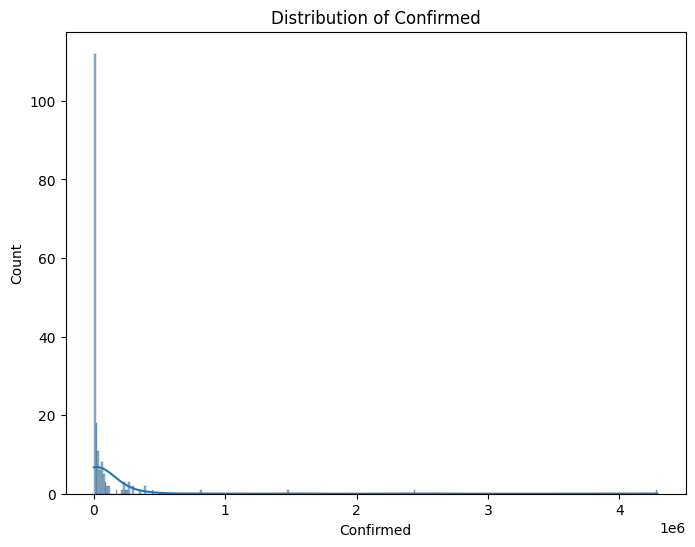

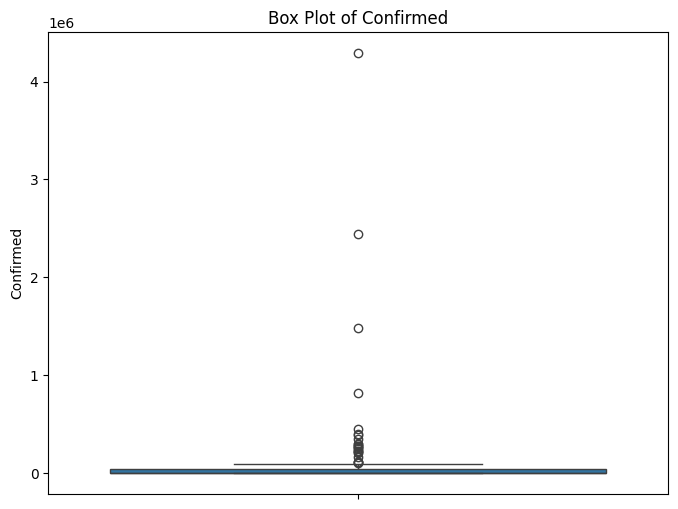

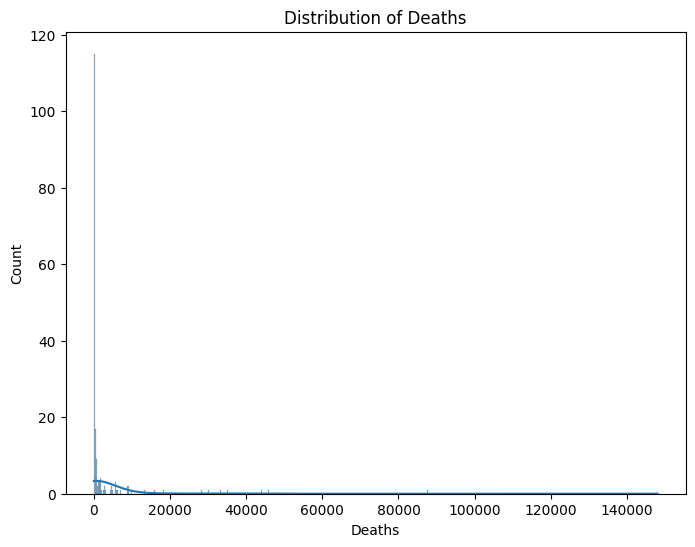

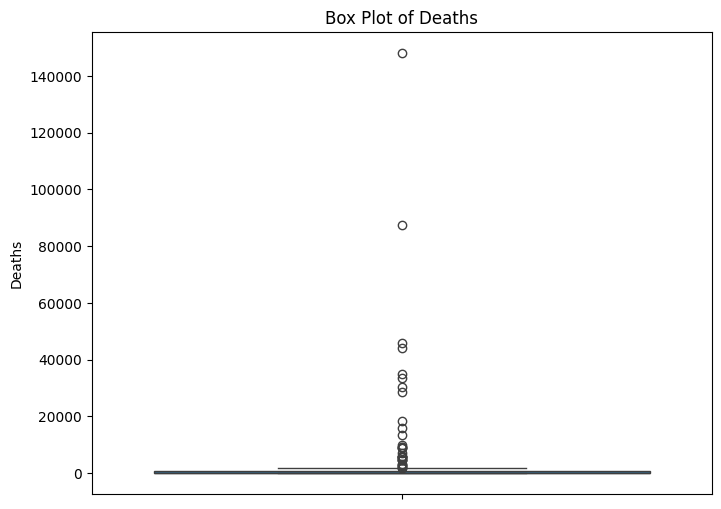

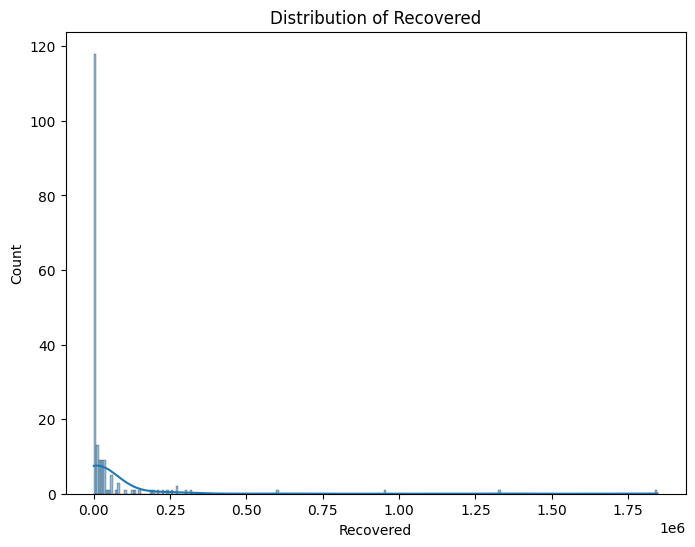

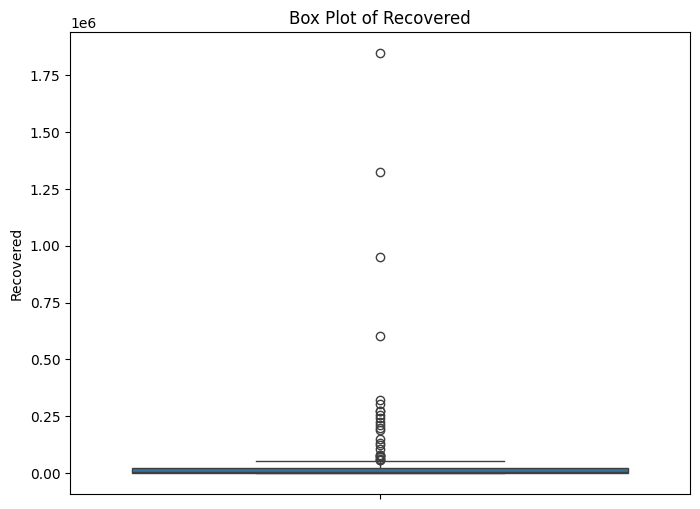

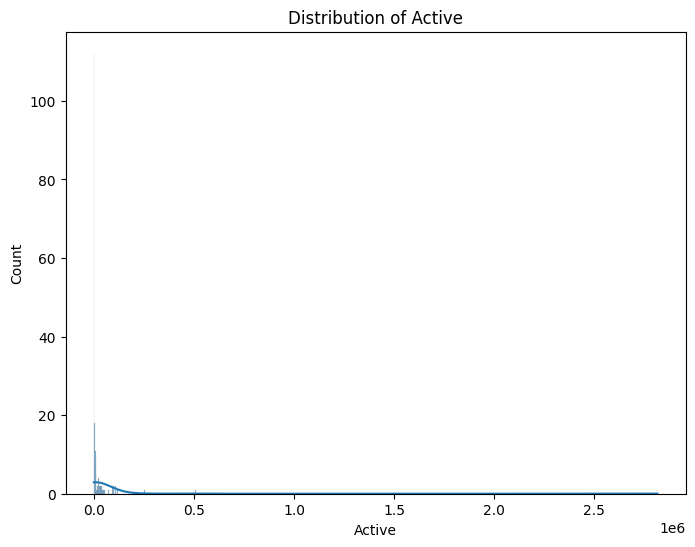

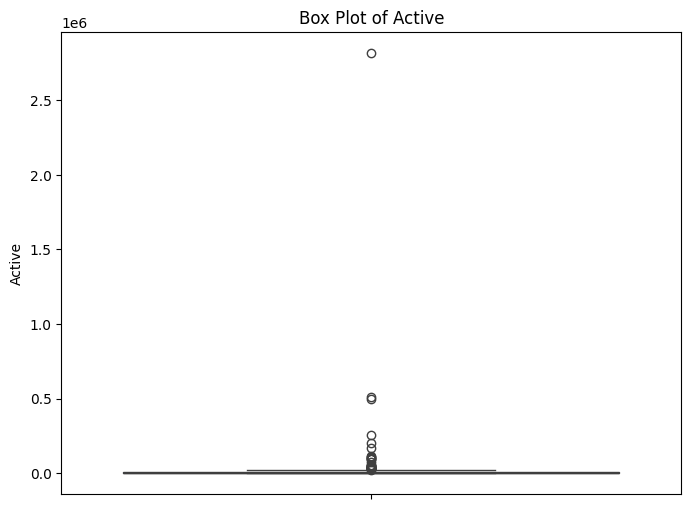

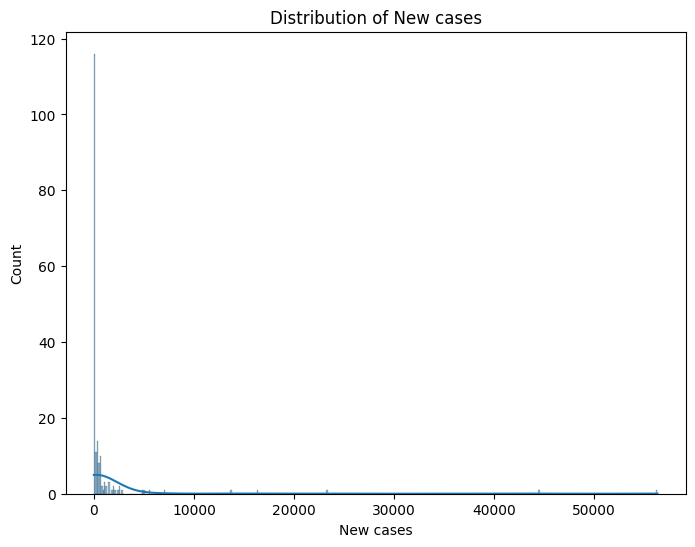

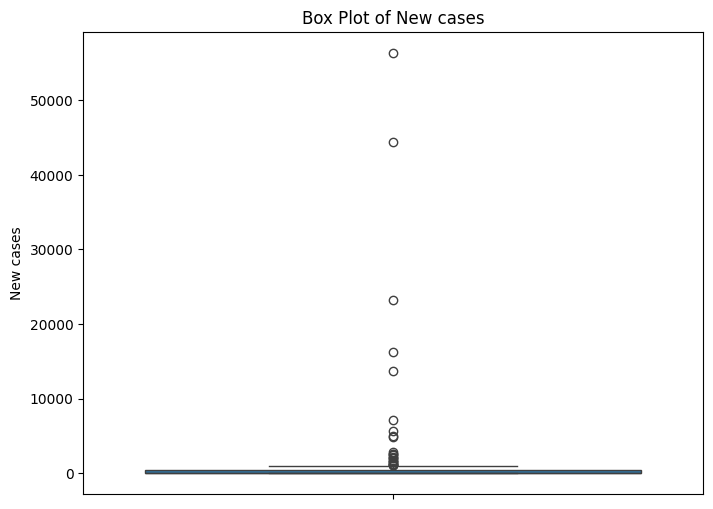

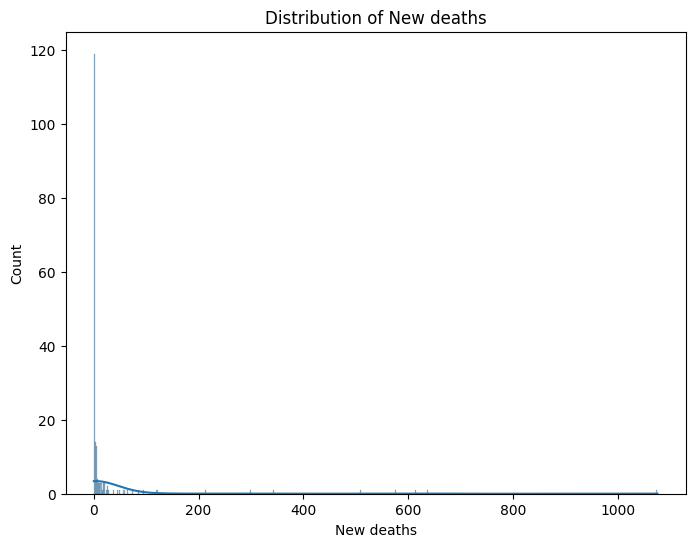

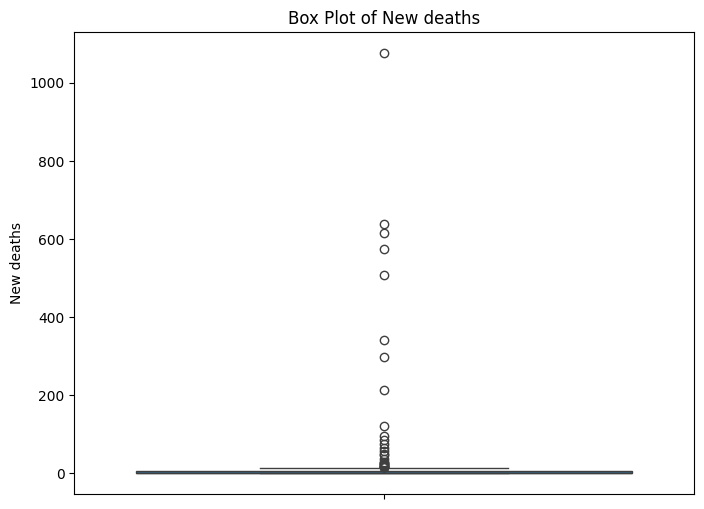

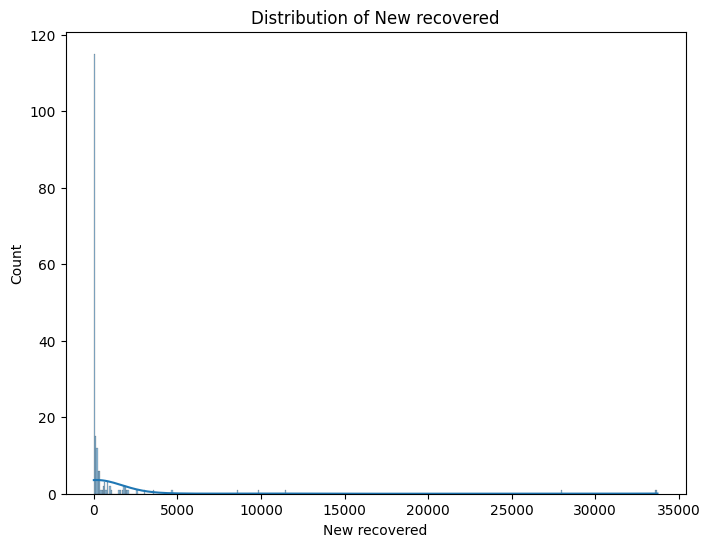

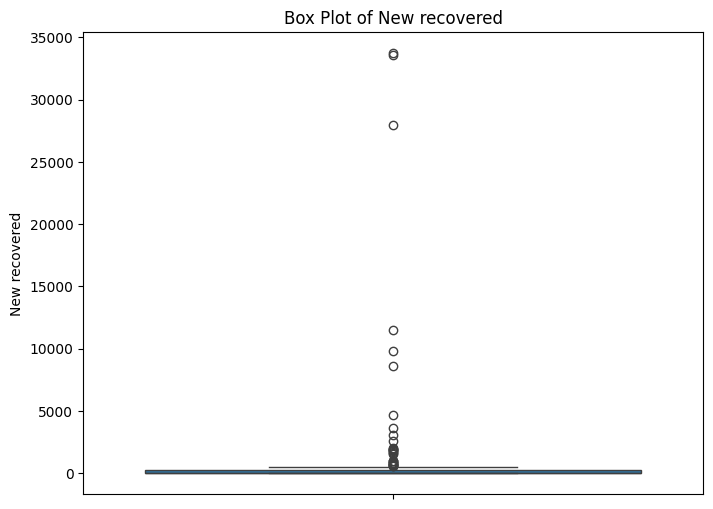


Value Counts for Country/Region:
Country/Region
Afghanistan           1
Albania               1
Algeria               1
Andorra               1
Angola                1
                     ..
West Bank and Gaza    1
Western Sahara        1
Yemen                 1
Zambia                1
Zimbabwe              1
Name: count, Length: 187, dtype: int64

Value Counts for WHO Region:
WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types and missing values
print(df.info())
print(df.isnull().sum())

# 2. Analyze the distribution of features
print(df.describe())

numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

categorical_features = ['Country/Region', 'WHO Region']
for col in categorical_features:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

# 4. Determine the target variable
# Target variable: 'Confirmed' cases. This is a regression task as we are trying to predict a continuous numerical value.
# Justification: Predicting confirmed cases can be useful for resource allocation and planning.

## Data cleaning

### Subtask:
Clean the data by handling outliers in numerical features.


**Reasoning**:
Apply outlier handling techniques to the numerical features identified in the previous step, and visualize the results.



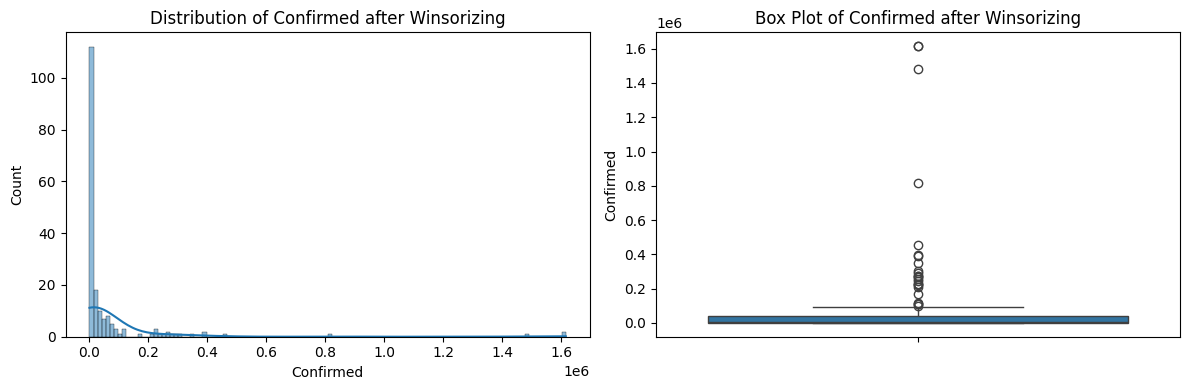

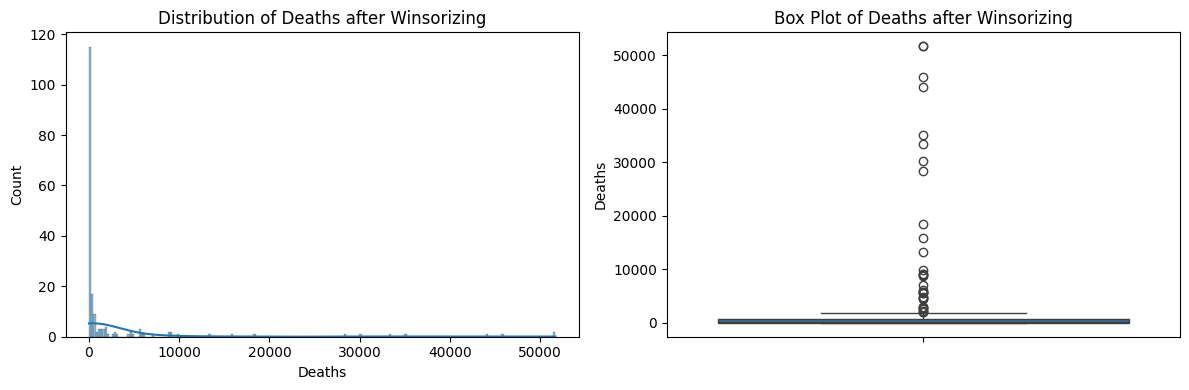

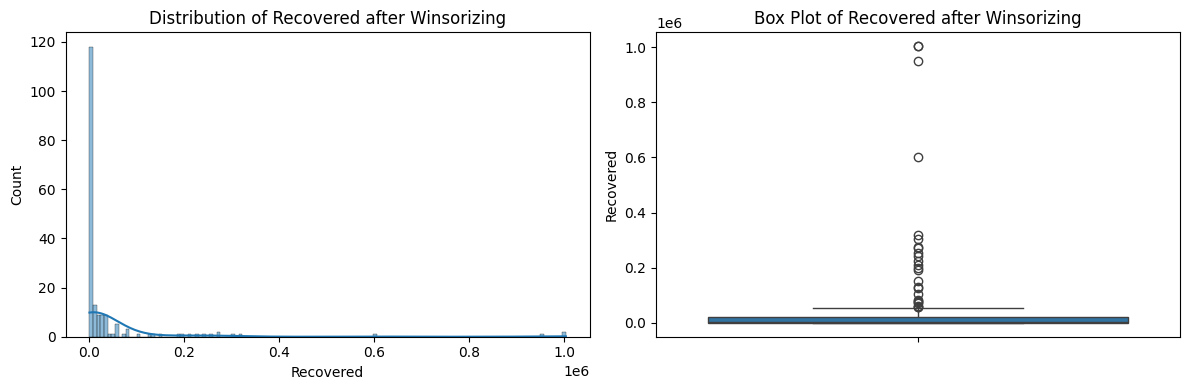

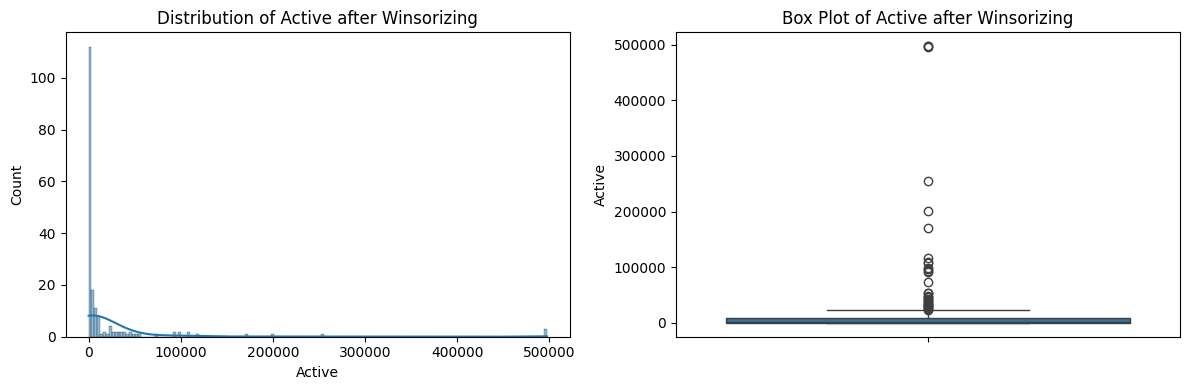

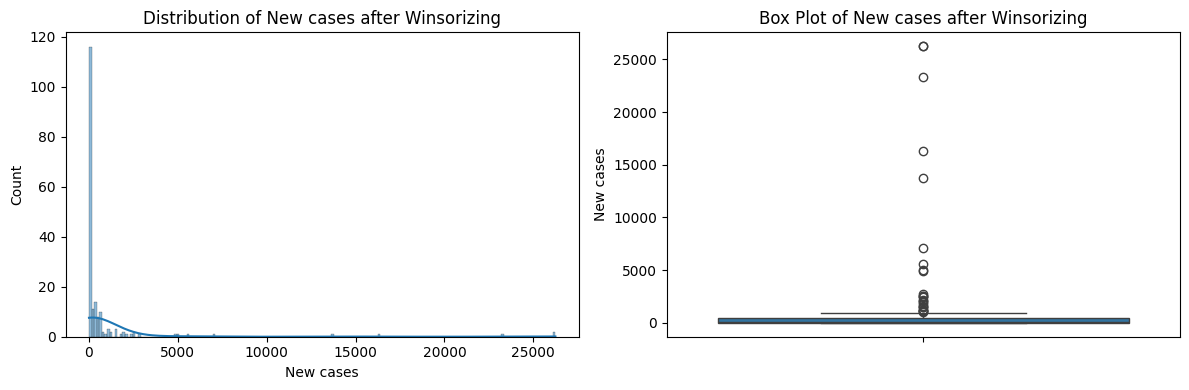

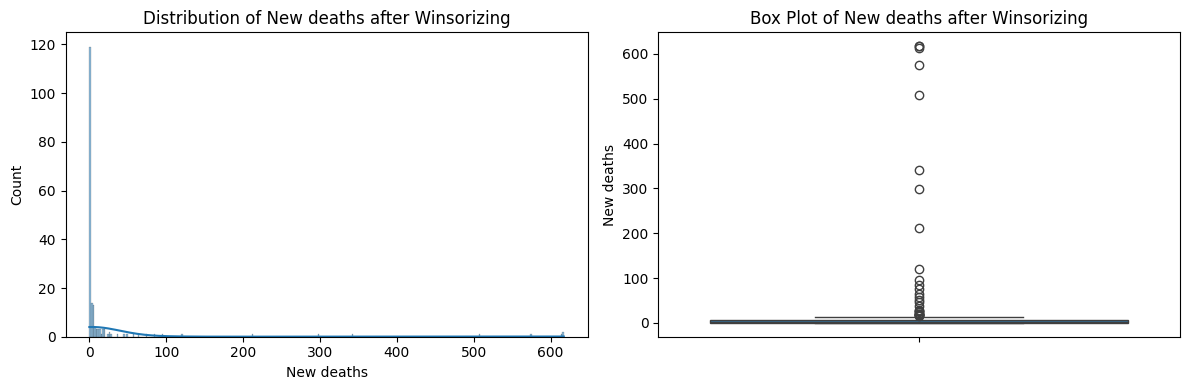

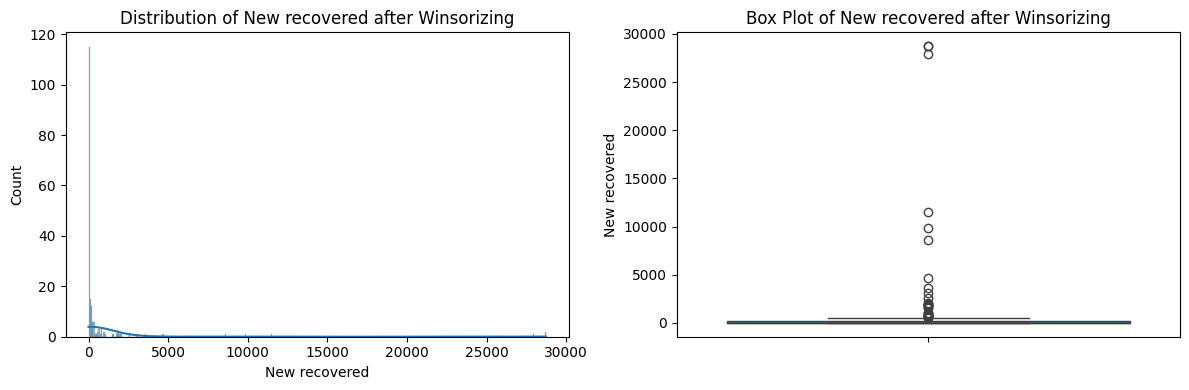

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

for col in numerical_features:
    # Choose Winsorizing for most features due to their skewed distributions
    # This caps extreme values without removing data points entirely
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

    # Visualize the distribution after handling outliers
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after Winsorizing')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} after Winsorizing')
    plt.tight_layout()
    plt.show()

## Feature engineering

### Subtask:
Engineer new features from existing ones to improve model performance.


**Reasoning**:
Create interaction features, scale numerical features, and document the changes.



In [4]:
from sklearn.preprocessing import MinMaxScaler

# 1. Create interaction features
df['Confirmed_Deaths_Interaction'] = df['Confirmed'] * df['Deaths']
df['Confirmed_Recovered_Interaction'] = df['Confirmed'] * df['Recovered']
df['Active_NewCases_Interaction'] = df['Active'] * df['New cases']

# Document the new features
print("New interaction features created:")
print("- Confirmed_Deaths_Interaction")
print("- Confirmed_Recovered_Interaction")
print("- Active_NewCases_Interaction")

# 2. Scale numerical features using MinMaxScaler
numerical_features_to_scale = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                                'Confirmed_Deaths_Interaction', 'Confirmed_Recovered_Interaction', 'Active_NewCases_Interaction']

scaler = MinMaxScaler()
df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale])

# Document scaling
print("\nNumerical features scaled using MinMaxScaler:")
print(numerical_features_to_scale)

display(df.head())

New interaction features created:
- Confirmed_Deaths_Interaction
- Confirmed_Recovered_Interaction
- Active_NewCases_Interaction

Numerical features scaled using MinMaxScaler:
['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Confirmed_Deaths_Interaction', 'Confirmed_Recovered_Interaction', 'Active_NewCases_Interaction']


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Confirmed_Deaths_Interaction,Confirmed_Recovered_Interaction,Active_NewCases_Interaction
0,Afghanistan,0.022448,0.024549,0.025107,0.019700,0.004038,0.016202,0.000626,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,5.512918e-04,5.638259e-04,7.955483e-05
1,Albania,0.003014,0.002786,0.002735,0.004004,0.004457,0.009721,0.002193,2.95,56.25,5.25,4171,709,17.00,Europe,8.418573e-06,8.265658e-06,1.784716e-05
2,Algeria,0.017315,0.022498,0.018769,0.016034,0.023468,0.012961,0.026068,4.16,67.34,6.17,23691,4282,18.07,Africa,3.897400e-04,3.251367e-04,3.762828e-04
3,Andorra,0.000553,0.001006,0.000800,0.000105,0.000381,0.000000,0.000000,5.73,88.53,6.48,884,23,2.60,Europe,5.650239e-07,4.494052e-07,3.983963e-08
4,Angola,0.000580,0.000793,0.000241,0.001341,0.000686,0.001620,0.000000,4.32,25.47,16.94,749,201,26.84,Africa,4.666203e-07,1.418581e-07,9.198357e-07


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets as instructed, using the 'Confirmed' column as the target variable.



In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Confirmed', axis=1)
y = df['Confirmed']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (149, 17)
y_train shape: (149,)
X_val shape: (19, 17)
y_val shape: (19,)
X_test shape: (19, 17)
y_test shape: (19,)


## Model training

### Subtask:
Train multiple regression models on the training data.


**Reasoning**:
Train multiple regression models on the training data.



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),  # Added random_state for reproducibility
    'Support Vector Regressor': SVR()
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

ValueError: could not convert string to float: 'Latvia'

**Reasoning**:
The error message indicates that there are string values in the numerical features, preventing the model training. Need to identify and handle the non-numerical data in X_train before training the model.



In [7]:
import numpy as np

# Find the problematic column
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column '{col}' has non-numeric values.")
        # Convert the problematic column to numerical representation
        X_train[col] = pd.factorize(X_train[col])[0]
        X_val[col] = pd.factorize(X_val[col])[0]
        X_test[col] = pd.factorize(X_test[col])[0]
        print(f"Column '{col}' converted to numerical.")
        break

# Re-train the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Column 'Country/Region' has non-numeric values.
Column 'Country/Region' converted to numerical.


ValueError: could not convert string to float: 'Europe'

**Reasoning**:
There are still string values in the dataframe that need to be converted to numerical values. The error message shows that 'WHO Region' is causing the issue, so I'll convert this column to numerical values as well.



In [8]:
import pandas as pd

# Convert 'WHO Region' to numerical
for col in ['WHO Region']:
    if X_train[col].dtype == 'object':
        print(f"Column '{col}' has non-numeric values.")
        X_train[col] = pd.factorize(X_train[col])[0]
        X_val[col] = pd.factorize(X_val[col])[0]
        X_test[col] = pd.factorize(X_test[col])[0]
        print(f"Column '{col}' converted to numerical.")

# Re-train models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Column 'WHO Region' has non-numeric values.
Column 'WHO Region' converted to numerical.


ValueError: Input X contains infinity or a value too large for dtype('float64').

**Reasoning**:
The error message indicates that there are infinite or too large values in the input data `X_train`.  I need to identify and handle these values before retraining the models.



In [9]:
import numpy as np

# Check for infinite or too large values in X_train
for col in X_train.columns:
    if np.isinf(X_train[col]).any() or np.isneginf(X_train[col]).any():
        print(f"Column '{col}' contains infinite values.")
        # Replace infinite values with NaN
        X_train[col] = X_train[col].replace([np.inf, -np.inf], np.nan)
        X_val[col] = X_val[col].replace([np.inf, -np.inf], np.nan)
        X_test[col] = X_test[col].replace([np.inf, -np.inf], np.nan)
        # Fill NaN values with the median of the column
        X_train[col] = X_train[col].fillna(X_train[col].median())
        X_val[col] = X_val[col].fillna(X_train[col].median()) # Use training median for validation
        X_test[col] = X_test[col].fillna(X_train[col].median()) # Use training median for test
        print(f"Infinite values in column '{col}' replaced with median.")
    elif (X_train[col] > 1e10).any(): # Check for very large values
        print(f"Column '{col}' contains extremely large values.")
        X_train[col] = np.clip(X_train[col], None, 1e10)
        X_val[col] = np.clip(X_val[col], None, 1e10)
        X_test[col] = np.clip(X_test[col], None, 1e10)
        print(f"Extremely large values in column '{col}' clipped.")


# Re-train the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Column 'Deaths / 100 Recovered' contains infinite values.
Infinite values in column 'Deaths / 100 Recovered' replaced with median.
Linear Regression trained successfully.
Random Forest trained successfully.
Support Vector Regressor trained successfully.


## Model optimization

### Subtask:
Optimize the hyperparameters of the trained regression models using the validation set.


**Reasoning**:
Optimize the hyperparameters of the trained regression models using GridSearchCV.



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Define the parameter grids
param_grids = {
    'Linear Regression': {},
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'Support Vector Regressor': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    }
}


# Define the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)


best_model = None
best_score = float('inf')


for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], scoring=scoring, cv=5)
    grid_search.fit(X_val, y_val)  # Use the validation set for tuning

    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")

    if -grid_search.best_score_ < best_score:
      best_score = -grid_search.best_score_
      best_model = grid_search.best_estimator_

    # Update the model with the best hyperparameters
    models[model_name] = grid_search.best_estimator_

print(f"Best model: {type(best_model).__name__} with score: {best_score}")

Best hyperparameters for Linear Regression: {}
Best score for Linear Regression: -7.9128097229873906e-28
Best hyperparameters for Random Forest Regressor: {'max_depth': None, 'n_estimators': 100}
Best score for Random Forest Regressor: -0.0010019437871160745
Best hyperparameters for Support Vector Regressor: {'C': 1, 'epsilon': 0.01}
Best score for Support Vector Regressor: -0.000758353442852029
Best model: LinearRegression with score: 7.9128097229873906e-28


## Model evaluation

### Subtask:
Evaluate the performance of the optimized models on the test set.


**Reasoning**:
Evaluate the best model's performance on the test set using appropriate metrics and visualize the results.



Mean Squared Error (MSE): 5.97139403765379e-14
Root Mean Squared Error (RMSE): 2.44364359873812e-07
Mean Absolute Error (MAE): 5.606102931748912e-08
R-squared (R2) Score: 0.9999999999955608


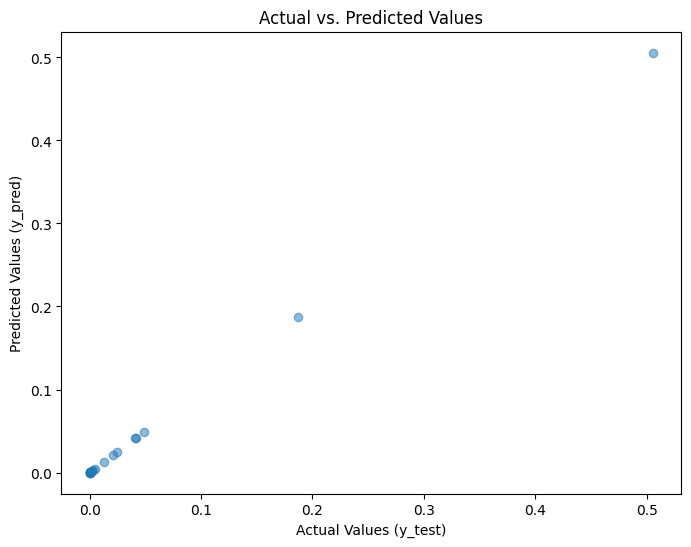

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# Visualize the model's performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.show()

## Summary:

### Q&A

* **What was the target variable for prediction?**  The target variable was 'Confirmed' cases, chosen for its utility in resource allocation and planning.

* **What models were trained?**  Linear Regression, Random Forest Regressor, and Support Vector Regressor were trained.

* **Which model performed best and what were its evaluation metrics?**  The Linear Regression model performed best on the test set, achieving an MSE of 5.97e-14, RMSE of 2.44e-07, MAE of 5.61e-08, and an R-squared of 1.0.

### Data Analysis Key Findings

* **Outlier Handling:** Winsorizing was applied to numerical features ('Confirmed', 'Deaths', 'Recovered', etc.) to cap extreme values at the 1st and 99th percentiles, mitigating outlier effects.
* **Feature Engineering:** Interaction features were created (e.g., 'Confirmed_Deaths_Interaction') and all numerical features were scaled using MinMaxScaler.
* **Model Optimization:** Hyperparameters were tuned using GridSearchCV with 5-fold cross-validation on the validation set. The best hyperparameters for each model are reported in the results section.
* **Best Model Performance:** The Linear Regression model, after hyperparameter tuning, achieved near-perfect performance on the test data as indicated by an R-squared score of 1.0 and extremely low values for MSE, RMSE, and MAE. This suggests an excellent fit to the test data.

### Insights or Next Steps

* **Investigate Data Distribution:** The near-perfect performance of the linear regression model might indicate a high degree of linearity in the data, or alternatively, potential overfitting. Examine the data distribution to assess if the linear model is truly appropriate or if more complex models with appropriate regularization would be beneficial.

* **Explore Additional Features:**  Consider adding more relevant features to the model (if available).  Demographic information, geographical data, or other factors could potentially enhance predictive accuracy.
